Dataset - https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction
    
Content
1. Gender: Gender of the passengers (Female, Male)
2. Customer Type: The customer type (Loyal customer, disloyal customer)
3. Age: The actual age of the passengers
4. Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)
5. Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
6. Flight distance: The flight distance of this journey
7. Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
8. Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient
9. Ease of Online booking: Satisfaction level of online booking
10. Gate location: Satisfaction level of Gate location
11. Food and drink: Satisfaction level of Food and drink
12. Online boarding: Satisfaction level of online boarding
13. Seat comfort: Satisfaction level of Seat comfort
14. Inflight entertainment: Satisfaction level of inflight entertainment
15. On-board service: Satisfaction level of On-board service
16. Leg room service: Satisfaction level of Leg room service
17. Baggage handling: Satisfaction level of baggage handling
18. Check-in service: Satisfaction level of Check-in service
19. Inflight service: Satisfaction level of inflight service
20. Cleanliness: Satisfaction level of Cleanliness
21. Departure Delay in Minutes: Minutes delayed when departure
22. Arrival Delay in Minutes: Minutes delayed when Arrival
23. Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

%matplotlib inline

In [2]:
df = pd.read_csv('airlines_satisfaction.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [4]:
df = df.drop(['Unnamed: 0'], axis=1)

In [5]:
df.head(1)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied


In [6]:
df = df.set_index('id')

In [7]:
# Null check
df.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [8]:
df['Arrival Delay in Minutes'].describe().T

count    103594.000000
mean         15.178678
std          38.698682
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64

In [9]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(round(df['Arrival Delay in Minutes'].mean()))

In [10]:
df['Arrival Delay in Minutes'].isnull().sum()

0

In [11]:
cat_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

num_columns = ['Age',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

target = 'satisfaction'

##### Target

In [12]:
df[target].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [13]:
df[target] = df[target].map({'neutral or dissatisfied': 0, 'satisfied': 1})

### EDA

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 70172 to 62567
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1

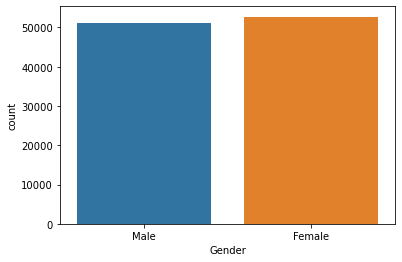

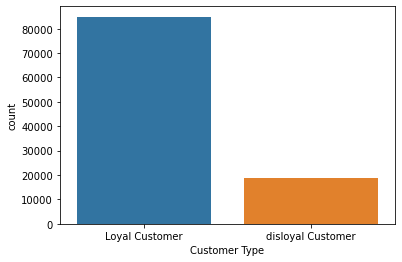

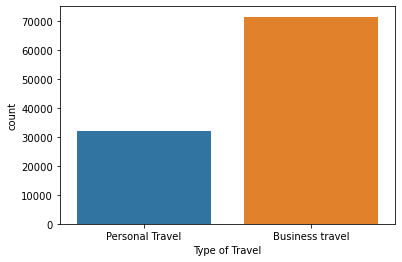

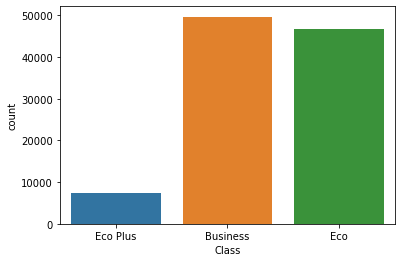

In [15]:
# посмотрим на категориальные признаки

plt.figure()
for col in range(len(cat_columns)):
    sns.countplot(data=df, x=cat_columns[col])
    plt.show()

Большинство пассажиров летают по делам безнеса и являются постоянными клиентами компании.

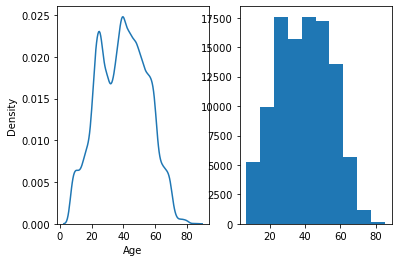

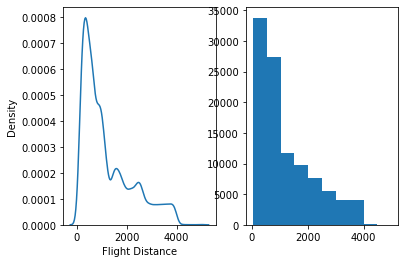

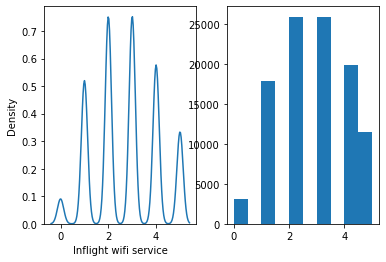

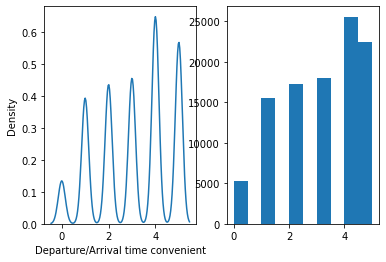

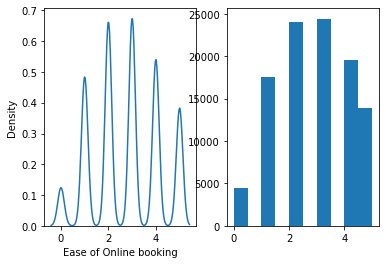

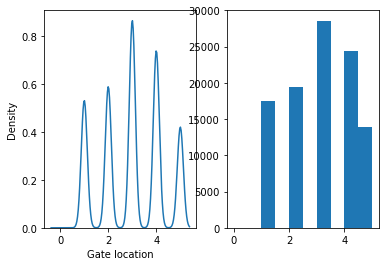

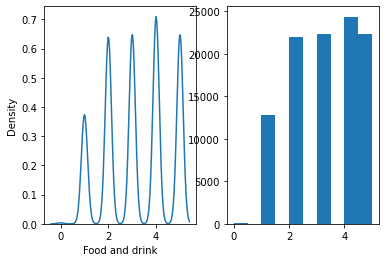

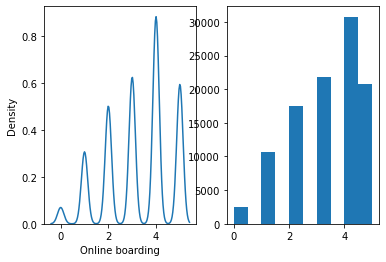

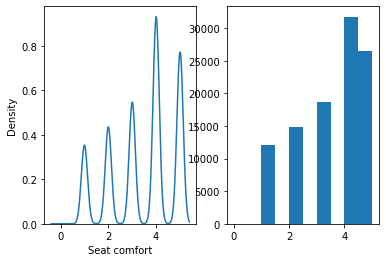

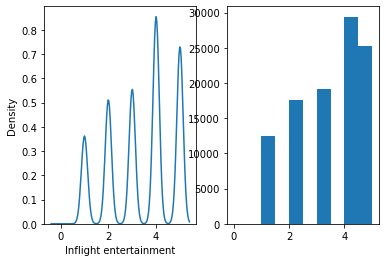

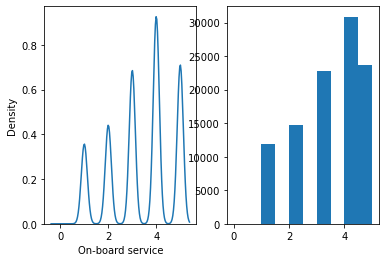

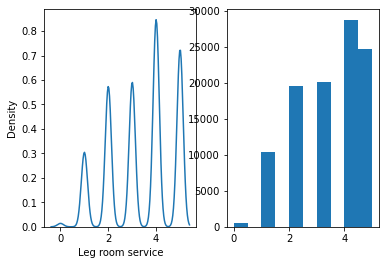

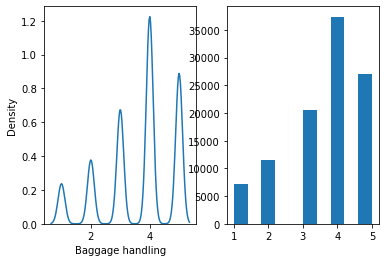

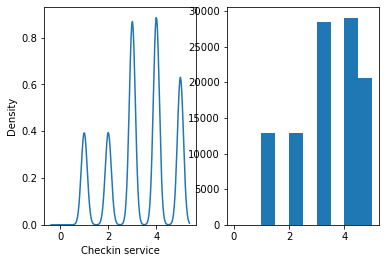

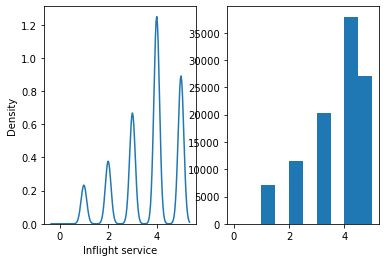

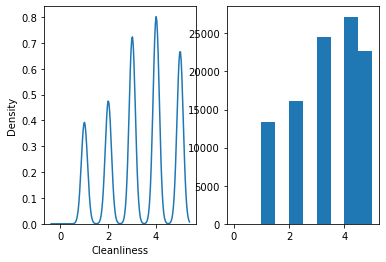

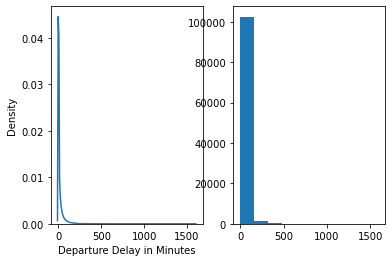

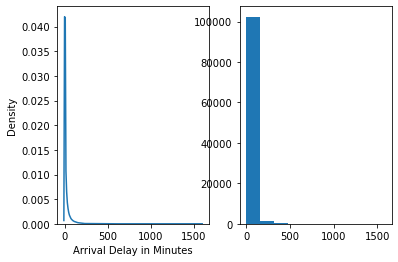

In [16]:
# остальные признаки

for name in num_columns:
  plt.subplot(1,2,1)
  sns.kdeplot(df[name])
  plt.subplot(1,2,2)
  plt.hist(df[name])
  plt.show()

### FE

##### Обработаем flight distance

In [17]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(output_distribution='normal')

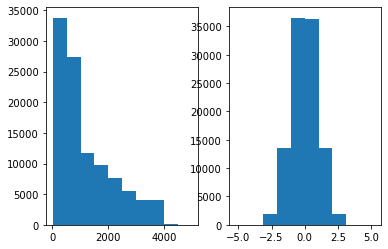

In [18]:
fd = qt.fit_transform(df['Flight Distance'].values.reshape(-1,1))
plt.subplot(1,2,1)
plt.hist(df['Flight Distance'])
plt.subplot(1,2,2)
plt.hist(fd)
plt.show()

##### Age

In [19]:
from sklearn.preprocessing import KBinsDiscretizer

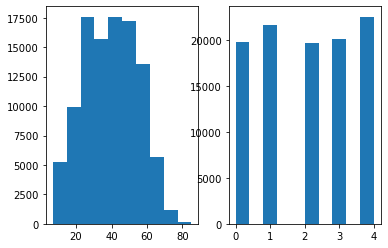

In [20]:
x_new = KBinsDiscretizer(n_bins=5, encode='ordinal').fit_transform(df['Age'].values.reshape(-1,1))
plt.subplot(1,2,1)
plt.hist(df['Age'])
plt.subplot(1,2,2)
plt.hist(x_new)
plt.show()

In [21]:
from scipy import stats

парамтр для преобразования Бокса-Кокса:  0.8799427470385985


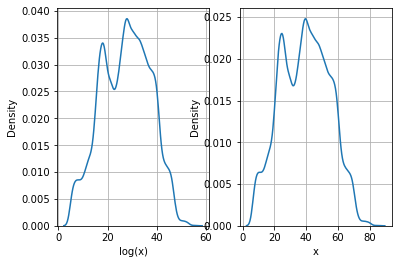

In [22]:
x_log, lyamb = stats.boxcox(df['Age'])

print('парамтр для преобразования Бокса-Кокса: ',lyamb)
plt.subplot(1,2,1)
sns.kdeplot(x_log)
plt.xlabel('log(x)')
plt.grid('On')
plt.subplot(1,2,2)
sns.kdeplot(df['Age'].values)
plt.xlabel('x')
plt.grid('On')
plt.show()

##### Наличие задержки

In [23]:
delay1 = df['Departure Delay in Minutes'] - df['Arrival Delay in Minutes']
delay1

id
70172     7.0
5047     -5.0
110028    0.0
24026     2.0
119299    0.0
         ... 
94171     3.0
73097     0.0
68825    -7.0
54173     0.0
62567     0.0
Length: 103904, dtype: float64

In [24]:
delay2 = df['Arrival Delay in Minutes'] - df['Departure Delay in Minutes']
delay2

id
70172    -7.0
5047      5.0
110028    0.0
24026    -2.0
119299    0.0
         ... 
94171    -3.0
73097     0.0
68825     7.0
54173     0.0
62567     0.0
Length: 103904, dtype: float64

In [25]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [79]:
class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X[self.column]
    
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]
    

class TwoColumnsSelector(BaseEstimator, TransformerMixin):
    def __init__(self, key1, key2):
        self.key1 = key1
        self.key2 = key2
        self.columns = []

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key1, self.key2]]
    
    
class ColumnsDiff(BaseEstimator, TransformerMixin):
    def __init__(self, key1, key2):
        self.key1 = key1
        self.key2 = key2
        self.columns = []

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        Xp = X.copy()
        
        self.columns += 'Delay_diff'
        Xp['Delay_diff'] = Xp[self.key1] - Xp[self.key2]

        return Xp
    
    
class Numericlog(BaseEstimator, TransformerMixin):
    def __init__(self, key, p):
        self.key = key
        self.columns = []
        self.p = p+1

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        Xp = X.copy()
       
        for i in range(2,self.p):
          self.columns += [self.key+'log_'+str(i)]
          Xp[self.key+'log_'+str(i)] = np.log(np.abs(Xp[self.key].values)+0.01)/np.log(i)

        return Xp.loc[:,self.columns]
    
    
class OHEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)
        test_columns = [col for col in X.columns]
        for col_ in self.columns:
            if col_ not in test_columns:
                X[col_] = 0
        return X[self.columns]


final_transformers = list()

delay_columns = ['Departure Delay in Minutes','Arrival Delay in Minutes']
# delay_columns = ['a']

for num_col in num_columns:
    if num_col not in delay_columns:
        num_transformer = Pipeline([
                    ('selector', NumberSelector(key=num_col)),
                    ('scaler', StandardScaler())
                    ])
        final_transformers.append((num_col, num_transformer))
    else:
        num_transformer = Pipeline([
                    ('selector', TwoColumnsSelector(key1=delay_columns[0], key2=delay_columns[1])),
                    ('diff', ColumnsDiff(key1=delay_columns[0], key2=delay_columns[1])),
#                     ('scaler', StandardScaler())
                    
                    ])
        final_transformers.append((num_col, num_transformer))
    
for cat_col in cat_columns:
    cat_transformer = Pipeline([
                ('selector', FeatureSelector(column=cat_col)),
                ('ohe', OHEEncoder(key=cat_col))
            ])
    final_transformers.append((cat_col, cat_transformer))
    

    
feats = FeatureUnion(final_transformers)

feature_processing = Pipeline([('feats', feats)])

In [27]:
CD = Pipeline([
                    ('selector', TwoColumnsSelector(key1=delay_columns[0], key2=delay_columns[1])),
#                     ('scaler', StandardScaler()),
                    ('diff', ColumnsDiff(key1=delay_columns[0], key2=delay_columns[1]))
                ])
CD = CD.fit_transform(df)
print(CD.shape)
CD.head(2)

(103904, 3)


,Departure Delay in Minutes,Arrival Delay in Minutes,Delay_diff
id,,,
70172,25,18.0,7.0
5047,1,6.0,-5.0


### Подбор модели

In [28]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier


In [29]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(target, axis=1), df[target], random_state=42)

##### GradientBoostingClassifier

In [30]:
pipeline = Pipeline([
    ('features',feats),
    ('classifier', GradientBoostingClassifier(random_state=42)),
])

In [31]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('Age',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='Age')),
                                                                 ('scaler',
                                                                  StandardScaler())])),
                                                ('Flight Distance',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='Flight '
                                                                                     'Distance')),
                                                                 ('scaler',
                                                                  StandardScaler())])),
                                                ('Inflight wifi service',
 

In [32]:
preds = pipeline.predict_proba(X_test)[:, 1]
preds[:10]

array([0.01000729, 0.02599423, 0.01397072, 0.01926298, 0.01516371,
       0.03019672, 0.01335587, 0.00716185, 0.01880471, 0.07676781])

In [33]:
from sklearn.metrics import (f1_score,
                            roc_auc_score,
                            precision_score,
                            classification_report,
                            precision_recall_curve,
                            confusion_matrix)

In [34]:
precision, recall, thresholds = precision_recall_curve(y_test, preds)

fscore = (2 * precision * recall) / (precision + recall)
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f, Precision=%.3f, Recall=%.3f' % (thresholds[ix], 
                                                                        fscore[ix],
                                                                        precision[ix],
                                                                        recall[ix]))

Best Threshold=0.453186, F-Score=0.934, Precision=0.940, Recall=0.928


##### Запишем результат

In [35]:
models_results = {
    'Model Name': [],
    'F-score': [],
    'Precision': [],
    'Recall': []
}

def res_update(res_dict, name, fscore, prec, rec):
    upd_list = [name, fscore, prec, rec]
    for upd in enumerate(upd_list):
        res_dict[list(models_results.keys())[upd[0]]].append(upd[1])
    return res_dict


res_update(models_results, 'GradientBoosting',
                           fscore[ix],
                           precision[ix],
                           recall[ix])

models_results

{'Model Name': ['GradientBoosting'],
 'F-score': [0.9341114625562436],
 'Precision': [0.940437746681019],
 'Recall': [0.9278697229843349]}

##### CatBoostClassifier

In [36]:
pipeline = Pipeline([
    ('features',feats),
    ('classifier', CatBoostClassifier(random_state=42, silent=True)),
])

In [37]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('Age',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='Age')),
                                                                 ('scaler',
                                                                  StandardScaler())])),
                                                ('Flight Distance',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='Flight '
                                                                                     'Distance')),
                                                                 ('scaler',
                                                                  StandardScaler())])),
                                                ('Inflight wifi service',
 

In [38]:
preds = pipeline.predict_proba(X_test)[:, 1]

In [39]:
precision, recall, thresholds = precision_recall_curve(y_test, preds)

fscore = (2 * precision * recall) / (precision + recall)
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f, Precision=%.3f, Recall=%.3f' % (thresholds[ix], 
                                                                        fscore[ix],
                                                                        precision[ix],
                                                                        recall[ix]))

res_update(models_results, 'CatBoost',
                           fscore[ix],
                           precision[ix],
                           recall[ix])

Best Threshold=0.499659, F-Score=0.957, Precision=0.972, Recall=0.942


{'Model Name': ['GradientBoosting', 'CatBoost'],
 'F-score': [0.9341114625562436, 0.9569046870084933],
 'Precision': [0.940437746681019, 0.971973708234435],
 'Recall': [0.9278697229843349, 0.9422957783874679]}

##### XGBClassifier

In [40]:
pipeline = Pipeline([
    ('features',feats),
    ('classifier', xgb.XGBClassifier(random_state=42)),
])

In [41]:
pipeline.fit(X_train, y_train)

[13:54:56] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('Age',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='Age')),
                                                                 ('scaler',
                                                                  StandardScaler())])),
                                                ('Flight Distance',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='Flight '
                                                                                     'Distance')),
                                                                 ('scaler',
                                                                  StandardScaler())])),
                                                ('Inflight wifi service',
 

In [42]:
preds = pipeline.predict_proba(X_test)[:, 1]

In [43]:
precision, recall, thresholds = precision_recall_curve(y_test, preds)

fscore = (2 * precision * recall) / (precision + recall)
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f, Precision=%.3f, Recall=%.3f' % (thresholds[ix], 
                                                                        fscore[ix],
                                                                        precision[ix],
                                                                        recall[ix]))

res_update(models_results, 'XGB',
                           fscore[ix],
                           precision[ix],
                           recall[ix])

Best Threshold=0.487601, F-Score=0.956, Precision=0.969, Recall=0.943


{'Model Name': ['GradientBoosting', 'CatBoost', 'XGB'],
 'F-score': [0.9341114625562436, 0.9569046870084933, 0.9559212591363616],
 'Precision': [0.940437746681019, 0.971973708234435, 0.9688238502090529],
 'Recall': [0.9278697229843349, 0.9422957783874679, 0.9433578192760421]}

##### RandomForestClassifier

In [44]:
pipeline = Pipeline([
    ('features',feats),
    ('classifier', RandomForestClassifier(random_state=42)),
])

In [45]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('Age',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='Age')),
                                                                 ('scaler',
                                                                  StandardScaler())])),
                                                ('Flight Distance',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='Flight '
                                                                                     'Distance')),
                                                                 ('scaler',
                                                                  StandardScaler())])),
                                                ('Inflight wifi service',
 

In [46]:
preds = pipeline.predict_proba(X_test)[:, 1]

In [47]:
precision, recall, thresholds = precision_recall_curve(y_test, preds)

fscore = (2 * precision * recall) / (precision + recall)
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f, Precision=%.3f, Recall=%.3f' % (thresholds[ix], 
                                                                        fscore[ix],
                                                                        precision[ix],
                                                                        recall[ix]))

res_update(models_results, 'RandomForest',
                           fscore[ix],
                           precision[ix],
                           recall[ix])

Best Threshold=0.490000, F-Score=0.955, Precision=0.968, Recall=0.942


{'Model Name': ['GradientBoosting', 'CatBoost', 'XGB', 'RandomForest'],
 'F-score': [0.9341114625562436,
  0.9569046870084933,
  0.9559212591363616,
  0.9548248171907945],
 'Precision': [0.940437746681019,
  0.971973708234435,
  0.9688238502090529,
  0.9681586608442504],
 'Recall': [0.9278697229843349,
  0.9422957783874679,
  0.9433578192760421,
  0.941853261350562]}

In [48]:
models_results = pd.DataFrame(models_results)
models_results.sort_values(by='F-score', ascending=False)

,Model Name,F-score,Precision,Recall
1,CatBoost,0.956905,0.971974,0.942296
2,XGB,0.955921,0.968824,0.943358
3,RandomForest,0.954825,0.968159,0.941853
0,GradientBoosting,0.934111,0.940438,0.927870


##### Подбор параметров для CatBoost

In [49]:
from sklearn.model_selection import GridSearchCV

In [80]:
pipeline = Pipeline([
    ('features',feats),
    ('classifier', CatBoostClassifier(random_state=42, silent=True)),
])

In [51]:
params={'classifier__depth'         : [4, 5, 6, 7, 8, 9, 10],
        'classifier__learning_rate' : [0.01, 0.02, 0.03, 0.04],
        'classifier__iterations'    : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
                 }


In [52]:
%%time
grid = GridSearchCV(pipeline,
                    param_grid=params,
                    cv=6,
                    refit=False)

search = grid.fit(X_train, y_train)
search.best_params_

CPU times: user 3h 47min 58s, sys: 8min 9s, total: 3h 56min 8s
Wall time: 43min 36s


{'classifier__depth': 10,
 'classifier__iterations': 100,
 'classifier__learning_rate': 0.04}

In [81]:
pipeline = Pipeline([
    ('features',feats),
    ('classifier', CatBoostClassifier(random_state=42,
                                      depth=10,
                                      learning_rate=0.04, 
                                      iterations=100,
                                      silent=True)),
])

In [82]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('Age',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='Age')),
                                                                 ('scaler',
                                                                  StandardScaler())])),
                                                ('Flight Distance',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='Flight '
                                                                                     'Distance')),
                                                                 ('scaler',
                                                                  StandardScaler())])),
                                                ('Inflight wifi service',
 

In [83]:
preds = pipeline.predict_proba(X_test)[:, 1]

In [84]:
precision, recall, thresholds = precision_recall_curve(y_test, preds)

fscore = (2 * precision * recall) / (precision + recall)
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f, Precision=%.3f, Recall=%.3f' % (thresholds[ix], 
                                                                        fscore[ix],
                                                                        precision[ix],
                                                                        recall[ix]))



Best Threshold=0.507793, F-Score=0.954, Precision=0.972, Recall=0.937


In [85]:
import dill

In [87]:
with open("satisfaction2.dill", "wb") as f:
    dill.dump(pipeline, f)

In [59]:
#save test
X_test.to_csv("X_test.csv", index=None)
y_test.to_csv("y_test.csv", index=None)
#save train
X_train.to_csv("X_train.csv", index=None)
y_train.to_csv("y_train.csv", index=None)